<a href="https://colab.research.google.com/github/AfeJohn/Data-Science/blob/main/Predictive_Analysis_on_House_Pricing_in_Nigeria.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Predictive Analysis on House Pricing in Nigeria**

**Importing the necessary python libraries**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
import seaborn as sns
from sklearn.metrics import mean_squared_error

**Reading the dataset to colab**

In [2]:
housing_df = pd.read_csv('nigeria_houses_data.csv')
housing_df.head()

,bedrooms,bathrooms,toilets,parking_space,title,town,state,price
0,6.0,5.0,5.0,4.0,Detached Duplex,Mabushi,Abuja,450000000.0
1,4.0,5.0,5.0,4.0,Terraced Duplexes,Katampe,Abuja,800000000.0
2,4.0,5.0,5.0,4.0,Detached Duplex,Lekki,Lagos,120000000.0
3,4.0,4.0,5.0,6.0,Detached Duplex,Ajah,Lagos,40000000.0
4,4.0,4.0,5.0,2.0,Semi Detached Duplex,Lekki,Lagos,75000000.0


In [3]:
housing_df.shape

(24326, 8)

**Data Exploration and preprocessing**

In [4]:
housing_df.isnull().sum()

bedrooms         0
bathrooms        0
toilets          0
parking_space    0
title            0
town             0
state            0
price            0
dtype: int64

In [5]:
housing_df['title'].unique() #to show the type of houses in view

array(['Detached Duplex', 'Terraced Duplexes', 'Semi Detached Duplex',
       'Detached Bungalow', 'Block of Flats', 'Semi Detached Bungalow',
       'Terraced Bungalow'], dtype=object)

In [6]:
housing_df['state'].unique() #to show the states of the houses in view

array(['Abuja', 'Lagos', 'Edo', 'Ogun', 'Oyo', 'Imo', 'Anambara',
       'Rivers', 'Enugu', 'Kaduna', 'Kwara', 'Nasarawa', 'Abia', 'Delta',
       'Akwa Ibom', 'Osun', 'Ekiti', 'Cross River', 'Kogi', 'Plateau',
       'Kano', 'Katsina', 'Bayelsa', 'Borno', 'Niger'], dtype=object)

In [7]:
#rename the title column to house_type
housing_df = housing_df.rename(columns={'title': 'house_type'})
housing_df.head(3)

,bedrooms,bathrooms,toilets,parking_space,house_type,town,state,price
0,6.0,5.0,5.0,4.0,Detached Duplex,Mabushi,Abuja,450000000.0
1,4.0,5.0,5.0,4.0,Terraced Duplexes,Katampe,Abuja,800000000.0
2,4.0,5.0,5.0,4.0,Detached Duplex,Lekki,Lagos,120000000.0


In [8]:
max_price_df = housing_df['price'].max()
max_price_df

1800000000000.0

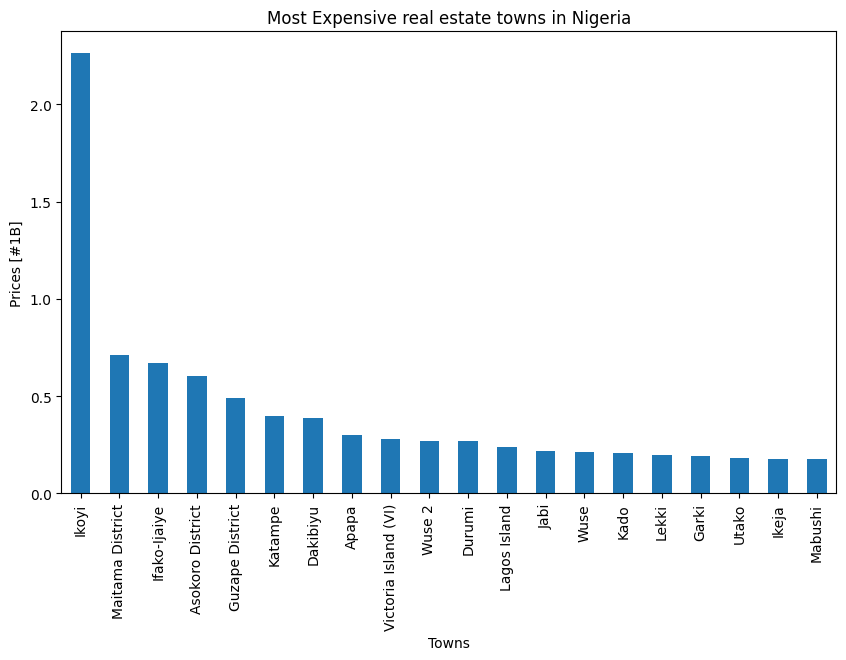

In [9]:
# Grouping by town and calculating the mean price
average_prices = housing_df.groupby("town")['price'].mean() / 1e9

# Sorting the results in descending order and selecting the top 20
top_towns = average_prices.sort_values(ascending=False).head(20)

# Plotting the bar chart
plt.figure(figsize=(10, 6))
top_towns.plot(kind='bar')
plt.xlabel('Towns')
plt.ylabel('Prices [#1B]')
plt.title('Most Expensive real estate towns in Nigeria')
plt.show()

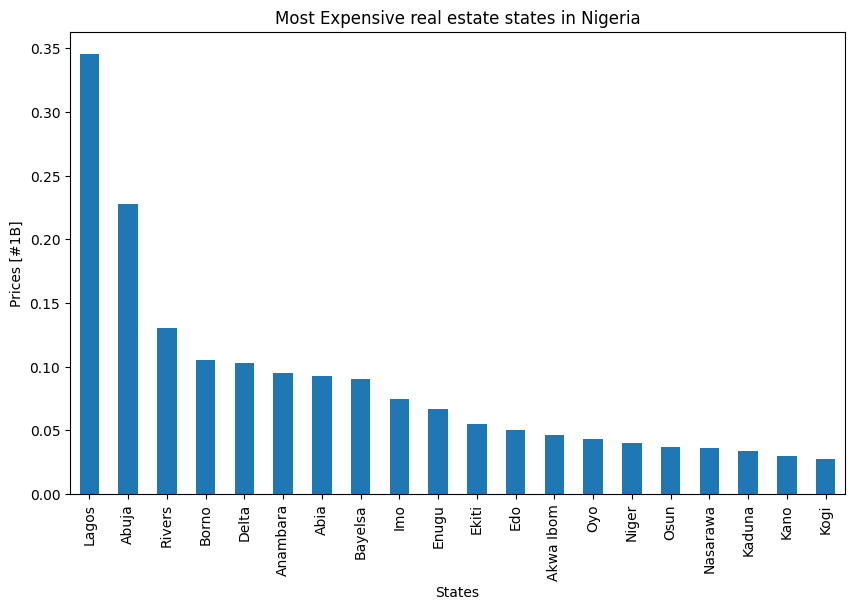

In [10]:
# Grouping by town and calculating the mean price
average_prices = housing_df.groupby("state")['price'].mean() / 1e9

# Sorting the results in descending order and selecting the top 20
top_towns = average_prices.sort_values(ascending=False).head(20)

# Plotting the bar chart
plt.figure(figsize=(10, 6))
top_towns.plot(kind='bar')
plt.xlabel('States')
plt.ylabel('Prices [#1B]')
plt.title('Most Expensive real estate states in Nigeria')
plt.show()

<Figure size 1800x800 with 0 Axes>

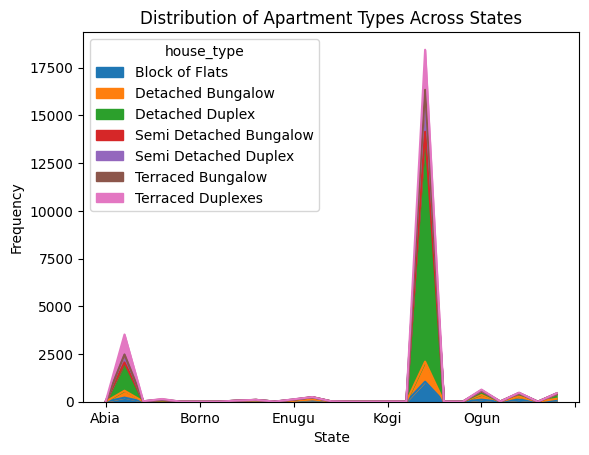

In [11]:
# Create a cross-tabulation of "state" and "house_type"
cross_tab = pd.crosstab(housing_df["state"], housing_df["house_type"])

# Plot the cross-tabulation as an area plot
plt.figure(figsize=(18, 8))
cross_tab.plot(kind="area")
plt.xlabel("State")
plt.ylabel("Frequency")
plt.title("Distribution of Apartment Types Across States")
plt.show()

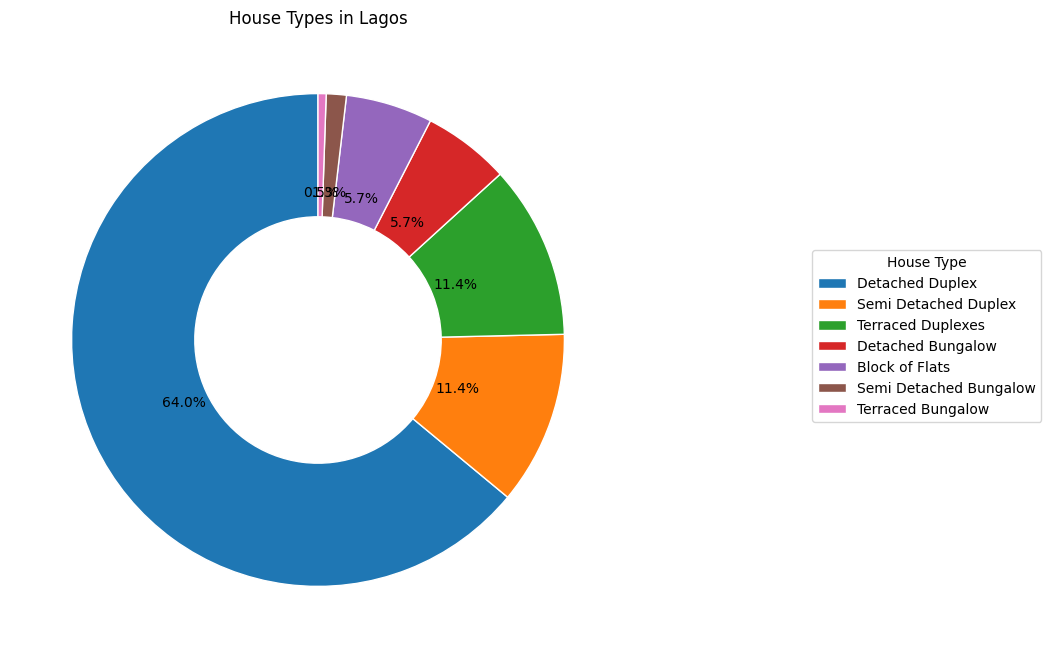

In [12]:
# To find the state with the most house types
state_high = housing_df['state'].mode().values[0]

# Count the occurrences of each house_type in the most common state
state_house_counts = housing_df[housing_df['state'] == state_high]['house_type'].value_counts()

# Plot a donut chart with adjusted labels
plt.figure(figsize=(10, 8))
plt.pie(state_house_counts, labels=None, autopct='%1.1f%%', startangle=90, wedgeprops=dict(width=0.5, edgecolor='w'))

# Add legend with long labels outside the pie chart
plt.legend(state_house_counts.index, title="House Type", bbox_to_anchor=(1, 0.5), loc="center left", bbox_transform=plt.gcf().transFigure)

plt.title(f'House Types in {state_high}')
plt.show()

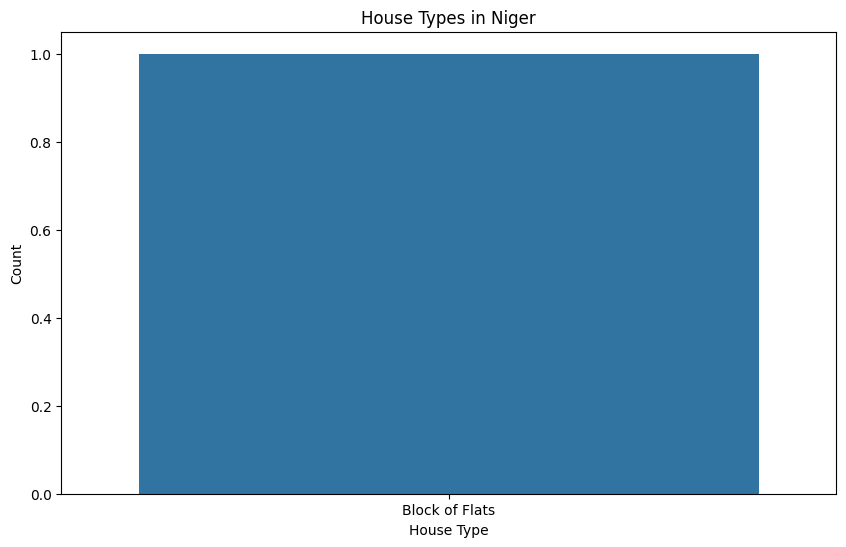

In [13]:
#To find the state with the most house types
state_least = housing_df['state'].value_counts().idxmin()

# Count the occurrences of each house_type in the most common state
state_house_counts = housing_df[housing_df['state'] == state_least]['house_type'].value_counts()

# Plot a bar chart to visualize house types in the most common state
plt.figure(figsize=(10, 6))
sns.barplot(x=state_house_counts.index, y=state_house_counts.values)
plt.title(f'House Types in {state_least}')
plt.xlabel('House Type')
plt.ylabel('Count')
plt.show()

In [14]:
# As it is Ikoyi stands as an outlier an it will cause for inaccuracy on predictions
print(housing_df[housing_df["town"] == "Ikoyi"].max())
print(housing_df[housing_df['town'] == 'Ifako-Ijaiye'].max())
#from the results gotten and the chart shown above we can see that this is a big anomaly, and will affect the code

bedrooms                       9.0
bathrooms                      9.0
toilets                        9.0
parking_space                  9.0
house_type       Terraced Duplexes
town                         Ikoyi
state                        Lagos
price              1800000000000.0
dtype: object
bedrooms                       7.0
bathrooms                      8.0
toilets                        8.0
parking_space                  8.0
house_type       Terraced Bungalow
town                  Ifako-Ijaiye
state                        Lagos
price                55000000000.0
dtype: object


In [15]:
#Removing outliers from the 'price' column using IQR method
Q1 = housing_df['price'].quantile(0.25)
Q3 = housing_df['price'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

#Filtering out values outside the lower and upper bounds
housing_df = housing_df[(housing_df['price'] >= lower_bound) & (housing_df['price'] <= upper_bound)]


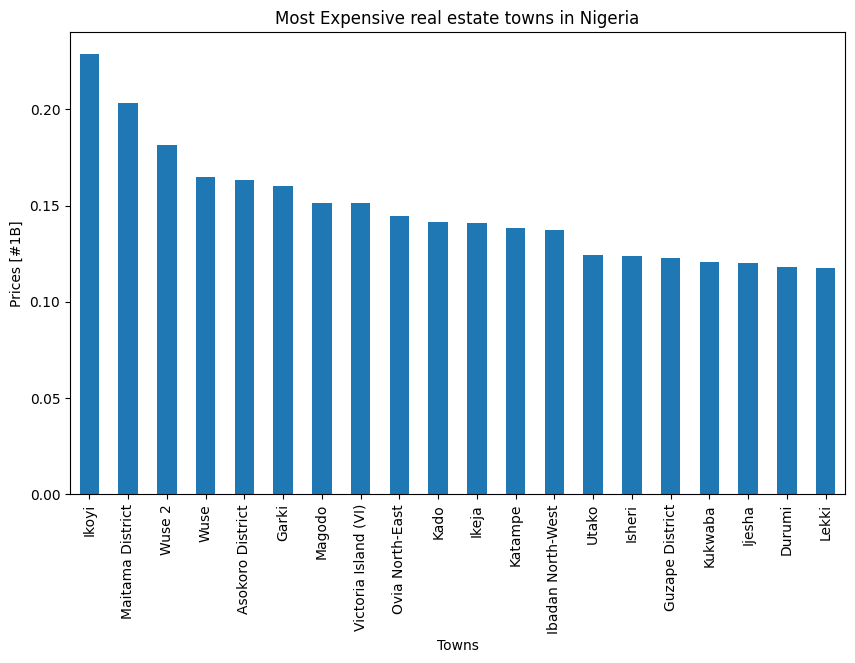

In [16]:
# Grouping by town and calculating the mean price
average_prices = housing_df.groupby("town")['price'].mean() / 1e9

# Sorting the results in descending order and selecting the top 20
top_towns = average_prices.sort_values(ascending=False).head(20)

# Plotting the bar chart
plt.figure(figsize=(10, 6))
top_towns.plot(kind='bar')
plt.xlabel('Towns')
plt.ylabel('Prices [#1B]')
plt.title('Most Expensive real estate towns in Nigeria')
plt.show()

In [ ]:
# Grouping by town and calculating the mean price
average_prices = housing_df.groupby("state")['price'].mean() / 1e9

# Sorting the results in descending order and selecting the top 20
top_states = average_prices.sort_values(ascending=False).head(20)

# Plotting the bar chart
plt.figure(figsize=(10, 6))
top_states.plot(kind='bar')
plt.xlabel('States')
plt.ylabel('Prices [#1B]')
plt.title('Most Expensive real estate states in Nigeria')
plt.show()

In [18]:
#We can see that the bar chart looks more acceptable

In [ ]:
# Grouping by house_type and calculating the mean price
average_prices = housing_df.groupby("house_type")['price'].mean() / 1e6
top_house_types = average_prices.sort_values(ascending=False)

plt.figure(figsize=(10, 6))
top_house_types.plot(kind="bar", xlabel="House type",
     ylabel="Price [#1M]",
     title="Average Price by Type of House");

In [20]:
#Performing label encoding
#Label encoding is a method of converting categorical data into numerical format, specifically assigning a unique integer to each category.
#The results will be informs of; title: 'Detached Duplex'=0, 'Terraced Duplexes'=1, ...
label_encoder = LabelEncoder()
categorical_columns =  ['house_type', 'town', 'state']
for column in categorical_columns:
  housing_df[column + '_Encoded'] = label_encoder.fit_transform(housing_df[column])

housing_df.head(3)

,bedrooms,bathrooms,toilets,parking_space,house_type,town,state,price,house_type_Encoded,town_Encoded,state_Encoded
2,4.0,5.0,5.0,4.0,Detached Duplex,Lekki,Lagos,120000000.0,2,122,17
3,4.0,4.0,5.0,6.0,Detached Duplex,Ajah,Lagos,40000000.0,2,10,17
4,4.0,4.0,5.0,2.0,Semi Detached Duplex,Lekki,Lagos,75000000.0,4,122,17


In [21]:
housing_df.describe()

,bedrooms,bathrooms,toilets,parking_space,price,house_type_Encoded,town_Encoded,state_Encoded
count,21768.000000,21768.000000,21768.000000,21768.000000,2.176800e+04,21768.000000,21768.000000,21768.000000
mean,4.233508,4.517549,5.096288,4.014011,9.872252e+07,2.607359,100.775956,14.813304
std,1.077467,1.115659,1.166132,1.362876,7.093633e+07,1.701276,45.130129,5.967298
min,1.000000,1.000000,1.000000,1.000000,9.000000e+04,0.000000,0.000000,0.000000
25%,4.000000,4.000000,5.000000,4.000000,4.800000e+07,2.000000,77.000000,17.000000
50%,4.000000,5.000000,5.000000,4.000000,7.800000e+07,2.000000,122.000000,17.000000
75%,5.000000,5.000000,6.000000,4.000000,1.300000e+08,4.000000,122.000000,17.000000
max,9.000000,9.000000,9.000000,9.000000,3.200000e+08,6.000000,188.000000,24.000000


In [22]:
housing_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21768 entries, 2 to 24325
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   bedrooms            21768 non-null  float64
 1   bathrooms           21768 non-null  float64
 2   toilets             21768 non-null  float64
 3   parking_space       21768 non-null  float64
 4   house_type          21768 non-null  object 
 5   town                21768 non-null  object 
 6   state               21768 non-null  object 
 7   price               21768 non-null  float64
 8   house_type_Encoded  21768 non-null  int64  
 9   town_Encoded        21768 non-null  int64  
 10  state_Encoded       21768 non-null  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 2.0+ MB


In [23]:
housing_df = housing_df.drop(['house_type','town','state'], axis=1)
housing_df.head(2)

,bedrooms,bathrooms,toilets,parking_space,price,house_type_Encoded,town_Encoded,state_Encoded
2,4.0,5.0,5.0,4.0,120000000.0,2,122,17
3,4.0,4.0,5.0,6.0,40000000.0,2,10,17


**Split Data**

In [24]:
#We divide the dataset into two subsets: one for training the machine learning model and the other for evaluating its performance.
#This is to assess how well the model generalizes to new, unseen data.
#and also to avoid overfitting, where the model performs well on the training data but poorly on new data.

# Specify features (x) and target variable (y)
x = housing_df.drop('price', axis=1)  # Features
y = housing_df['price']  # Target variable

# Spliting the data into training and testing sets (e.g., 80% training, 20% testing)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Checking the sizes of the resulting sets
print("Training set size:", len(x_train))
print("Testing set size:", len(x_test))

Training set size: 17414
Testing set size: 4354


In [25]:
from sklearn.preprocessing import MinMaxScaler

# Create a scaler
scaler = MinMaxScaler()

# Fit and transform the training features
x_train_scaled = scaler.fit_transform(x_train)

# Transform the testing features
x_test_scaled = scaler.transform(x_test)

**Defining the model (RandomForest)**

In [26]:
# Defining and training the model
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(x_train_scaled, y_train)

# Predictions and Evaluation
predictions = model.predict(x_test_scaled)
mse = mean_squared_error(y_test, predictions)
print("Mean Squared Error on Testing Set:", mse)

Mean Squared Error on Testing Set: 2405418110842921.0


In [28]:
# Feature Importance
feature_importance = model.feature_importances_

In [ ]:
predictions = model.predict(x_test)

# Display a few predicted values
predicted_values = pd.DataFrame({'Actual Price': y_test.values, 'Predicted Price': predictions.flatten()})
print(predicted_values.head())


In [ ]:
# Plotting the predicted vs actual prices
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Actual Price', y='Predicted Price', data=predicted_values)
plt.title('Actual vs Predicted Prices')
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.show()

# Plotting the distribution of errors
errors = y_test - predictions.flatten()
plt.figure(figsize=(10, 6))
sns.histplot(errors, kde=True)
plt.title('Distribution of Prediction Errors')
plt.xlabel('Prediction Error')
plt.show()

# Plotting feature importance
plt.figure(figsize=(12, 6))
sns.barplot(x=x_train.columns, y=feature_importance)
plt.title('Feature Importance')
plt.xlabel('Features')
plt.ylabel('Importance')
plt.xticks(rotation=45)
plt.show()


In [ ]:
# Calculate Mean Squared Error
mse = mean_squared_error(y_test, predictions.flatten())

# Print the Mean Squared Error
print("Mean Squared Error on Testing Set:", mse)